## Imports

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Carrega o arquivo 'remuneracao_servidores.csv' e cria um DataFrame a partir dele.

In [15]:
file_path = r'../ds/remuneracao_servidores.csv'
rem_org = pd.read_csv(file_path, sep=',', header=0, decimal='.')

try:       
    rem_org.drop('Unnamed: 0', axis=1, inplace=True)
except:
    print("no unnamed column.")
        
rem_org = rem_org.sort_values(by=['ANO', 'ORGAO', 'MES'])

# Cria uma lista com o nome dos órgãos e outra com os anos 
anos = rem_org["ANO"].drop_duplicates()
orgaos = rem_org["ORGAO"].drop_duplicates()

# Retira espaço inicial
rem_org.rename(columns={' REMUNERACAO LEGAL DEVIDA(R$)' : 'REMUNERACAO LEGAL DEVIDA(R$)'}, inplace=True)

## Funções

### Plotagem em barra

In [7]:
def plot_bar(title, labels, data, xlabel, ylabel):
    plt.figure(figsize=[20,10], dpi=100)
    index = np.arange(len(labels))
    plt.bar(index, data)
    plt.xlabel(xlabel, fontsize=30)
    plt.ylabel(ylabel, fontsize=30)
    plt.xticks(index, labels, fontsize=10, rotation=90)
    plt.title(title)
    plt.show()

### Plotagem em linha

In [8]:
def plot_line():
    plt.figure(figsize=[20,10])
    plt.plot(orgao_tots, label = orgao)
    plt.legend(loc=0)
    ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)

# Plotagens

### Remuneração Legal Devida por mês

Remuneração do mês < R$100.000

In [9]:

data = []

for orgao in orgaos:
    print(orgao)
    maior = 0
    orgao_tots = []
    
#     if(orgao != 'UEA' and orgao != 'SEAD'):
#         continue
        
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
#     print(maior)
    if (maior < 100000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")

ADS
FHEMOAM
SECOM
SEAD
SEAD-PENSÃO ESPECIAL I
SEAD-PENSÃO HANSENIANOS
SERIRA
ADAF
ALFREDO DA MATA
ARSAM
CASA CIVIL DO GOVERNO
CASA MILITAR
CB-CIVIS
CBMAM
CETAM
CGE
CGL
DETRAN
ERGSP
FAPEAM
FCECON
FEI
FHAJ
FMT-AM
FUNDAÇÃO AMAZONPREV
FUNTEC
FVS
IDAM
IMPRENSA OFICIAL
IPAAM
IPEM-AM
JUCEA
OUVIDORIA GERAL
PGE
PM-CIVIS
POLICIA CIVIL
SEAD-PENSÃO ESPECIAL II
SEAP
SEAS
SEC
SEFAZ
SEINFRA
SEJEL
SEJUSC
SEMA
SEPED
SEPLANCTI
SEPROR
SETRAB
SNPH
SPF
SRMM
SSP
SUHAB
SUSAM
UEA
UGPE
VICE-GOVERNADORIA
AMAZONPREV
PENSIONISTAS
SEDUC


 100.000 <= Remuneração do mês < 1.000.000

ADS
foi
FHEMOAM
SECOM
foi
SEAD
SEAD-PENSÃO ESPECIAL I
foi
SEAD-PENSÃO HANSENIANOS
SERIRA
foi
ADAF
foi
ALFREDO DA MATA
AMAZONPREV
ARSAM
foi
CASA CIVIL DO GOVERNO
CASA MILITAR
foi
CB-CIVIS
foi
CBMAM
CETAM
foi
CGE
foi
CGL
foi
DETRAN
ERGSP
foi
FAPEAM
foi
FCECON
FEI
FHAJ
FMT-AM
FUNDAÇÃO AMAZONPREV
foi
FUNTEC
foi
FVS
IDAM
IMPRENSA OFICIAL
foi
IPAAM
IPEM-AM
foi
JUCEA
foi
OUVIDORIA GERAL
foi
PENSIONISTAS
PGE
PM-CIVIS
foi
POLICIA CIVIL
SEAD-PENSÃO ESPECIAL II
foi
SEAP
SEAS
SEC
SEDUC
SEFAZ
SEINFRA
SEJEL
SEJUSC
SEMA
foi
SEPED
foi
SEPLANCTI
SEPROR
foi
SETRAB
foi
SNPH
foi
SPF
foi
SRMM
foi
SSP
SUHAB
SUSAM
UEA
UGPE
foi
VICE-GOVERNADORIA
foi


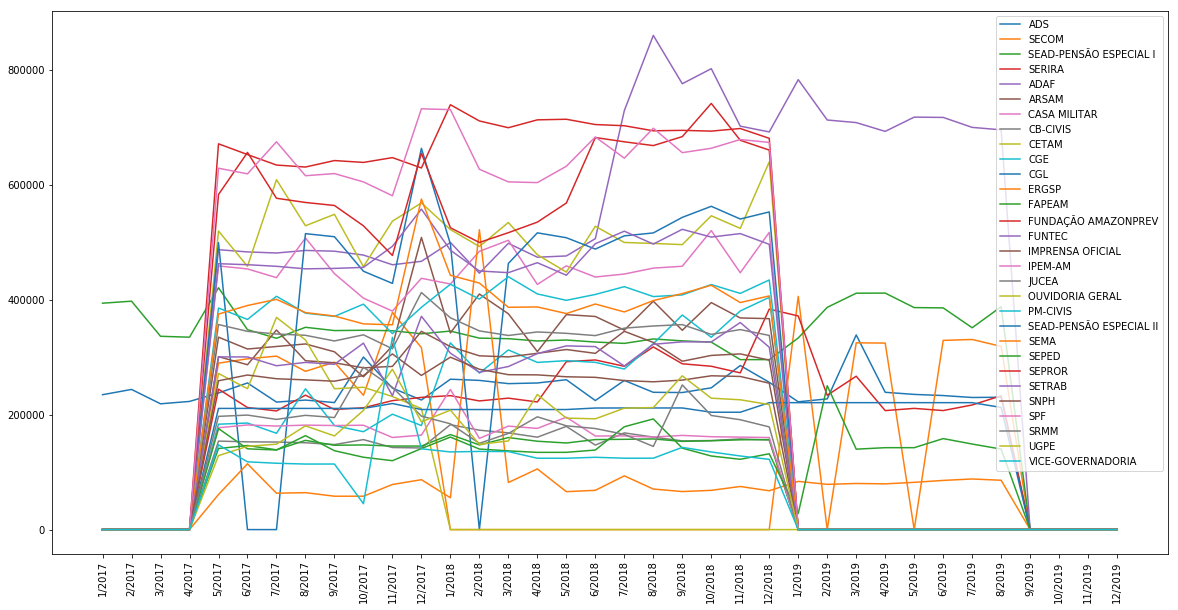

In [12]:
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    print(orgao)
    
    orgao_tots = []
    maior = 0
#     if(orgao != 'UEA' and orgao != 'SEAD'):
#         continue
        
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
#     print(maior)
    if (maior >= 100000 and maior < 1000000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")

 1.000.000 <= Remuneração do mês < 10.000.000

ADS
FHEMOAM
foi
SECOM
SEAD
foi
SEAD-PENSÃO ESPECIAL I
SEAD-PENSÃO HANSENIANOS
foi
SERIRA
ADAF
ALFREDO DA MATA
foi
AMAZONPREV
ARSAM
CASA CIVIL DO GOVERNO
foi
CASA MILITAR
CB-CIVIS
CBMAM
foi
CETAM
CGE
CGL
DETRAN
foi
ERGSP
FAPEAM
FCECON
foi
FEI
foi
FHAJ
foi
FMT-AM
foi
FUNDAÇÃO AMAZONPREV
FUNTEC
FVS
foi
IDAM
foi
IMPRENSA OFICIAL
IPAAM
foi
IPEM-AM
JUCEA
OUVIDORIA GERAL
PENSIONISTAS
PGE
foi
PM-CIVIS
POLICIA CIVIL
SEAD-PENSÃO ESPECIAL II
SEAP
foi
SEAS
foi
SEC
foi
SEDUC
SEFAZ
SEINFRA
foi
SEJEL
foi
SEJUSC
foi
SEMA
SEPED
SEPLANCTI
foi
SEPROR
SETRAB
SNPH
SPF
SRMM
SSP
foi
SUHAB
foi
SUSAM
UEA
UGPE
VICE-GOVERNADORIA


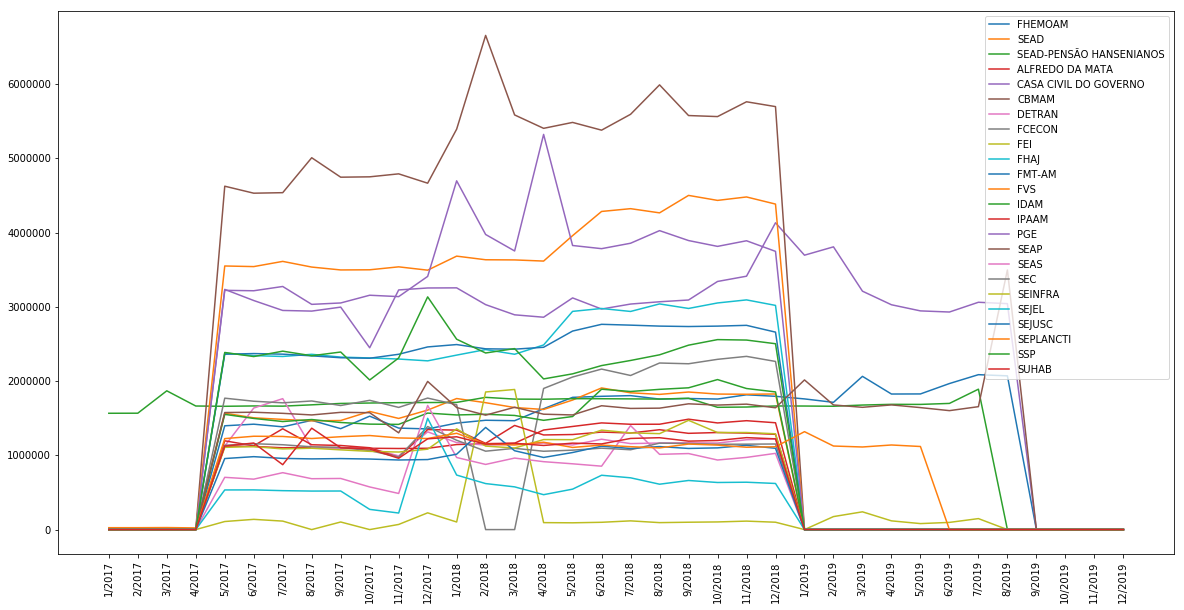

In [10]:
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    print(orgao)
    maior = 0
    orgao_tots = []
    
#     if(orgao != 'UEA' and orgao != 'SEAD'):
#         continue
        
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
#     print(maior)
    if (maior >= 1000000 and maior < 10000000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")

Remuneração do mês > 10.000.000

ADS
FHEMOAM
SECOM
SEAD
SEAD-PENSÃO ESPECIAL I
SEAD-PENSÃO HANSENIANOS
SERIRA
ADAF
ALFREDO DA MATA
AMAZONPREV
ARSAM
CASA CIVIL DO GOVERNO
CASA MILITAR
CB-CIVIS
CBMAM
CETAM
CGE
CGL
DETRAN
ERGSP
FAPEAM
FCECON
FEI
FHAJ
FMT-AM
FUNDAÇÃO AMAZONPREV
FUNTEC
FVS
IDAM
IMPRENSA OFICIAL
IPAAM
IPEM-AM
JUCEA
OUVIDORIA GERAL
PENSIONISTAS
foi
PGE
PM-CIVIS
POLICIA CIVIL
foi
SEAD-PENSÃO ESPECIAL II
SEAP
SEAS
SEC
SEDUC
SEFAZ
foi
SEINFRA
SEJEL
SEJUSC
SEMA
SEPED
SEPLANCTI
SEPROR
SETRAB
SNPH
SPF
SRMM
SSP
SUHAB
SUSAM
foi
UEA
foi
UGPE
VICE-GOVERNADORIA


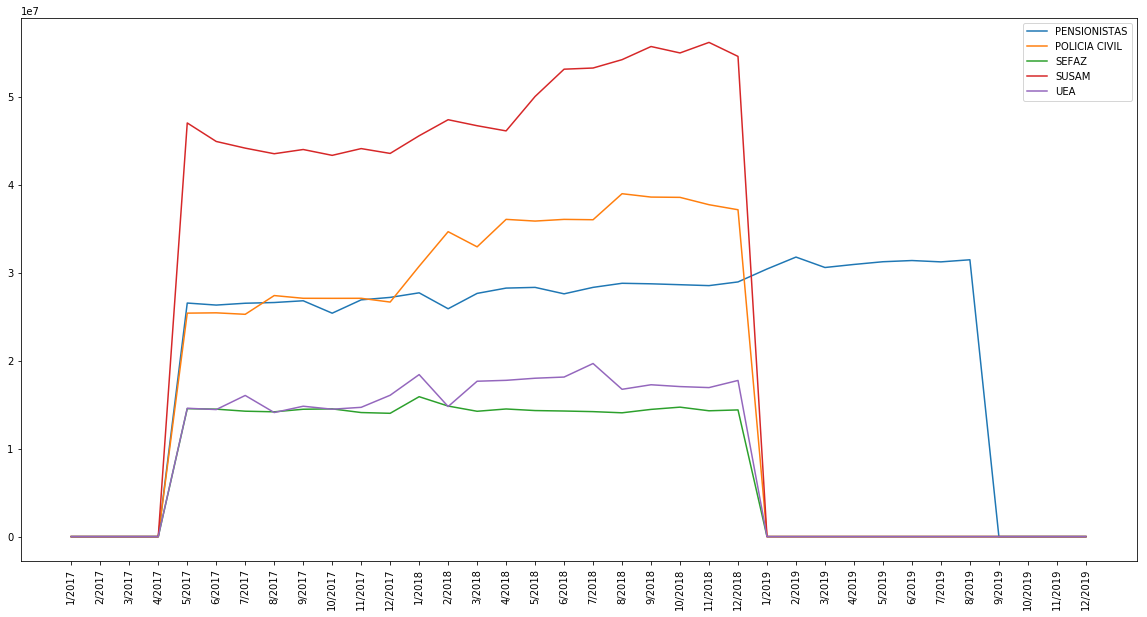

In [9]:
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    print(orgao)
    maior = 0
    orgao_tots = []
    
#     if(orgao != 'UEA' and orgao != 'SEAD'):
#         continue
        
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
#     print(maior)
    if (maior >= 10000000 and maior < 100000000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")

Remuneração do mês > R$100.000.000

ADS
FHEMOAM
SECOM
SEAD
SEAD-PENSÃO ESPECIAL I
SEAD-PENSÃO HANSENIANOS
SERIRA
ADAF
ALFREDO DA MATA
AMAZONPREV
foi
ARSAM
CASA CIVIL DO GOVERNO
CASA MILITAR
CB-CIVIS
CBMAM
CETAM
CGE
CGL
DETRAN
ERGSP
FAPEAM
FCECON
FEI
FHAJ
FMT-AM
FUNDAÇÃO AMAZONPREV
FUNTEC
FVS
IDAM
IMPRENSA OFICIAL
IPAAM
IPEM-AM
JUCEA
OUVIDORIA GERAL
PENSIONISTAS
PGE
PM-CIVIS
POLICIA CIVIL
SEAD-PENSÃO ESPECIAL II
SEAP
SEAS
SEC
SEDUC
foi
SEFAZ
SEINFRA
SEJEL
SEJUSC
SEMA
SEPED
SEPLANCTI
SEPROR
SETRAB
SNPH
SPF
SRMM
SSP
SUHAB
SUSAM
UEA
UGPE
VICE-GOVERNADORIA


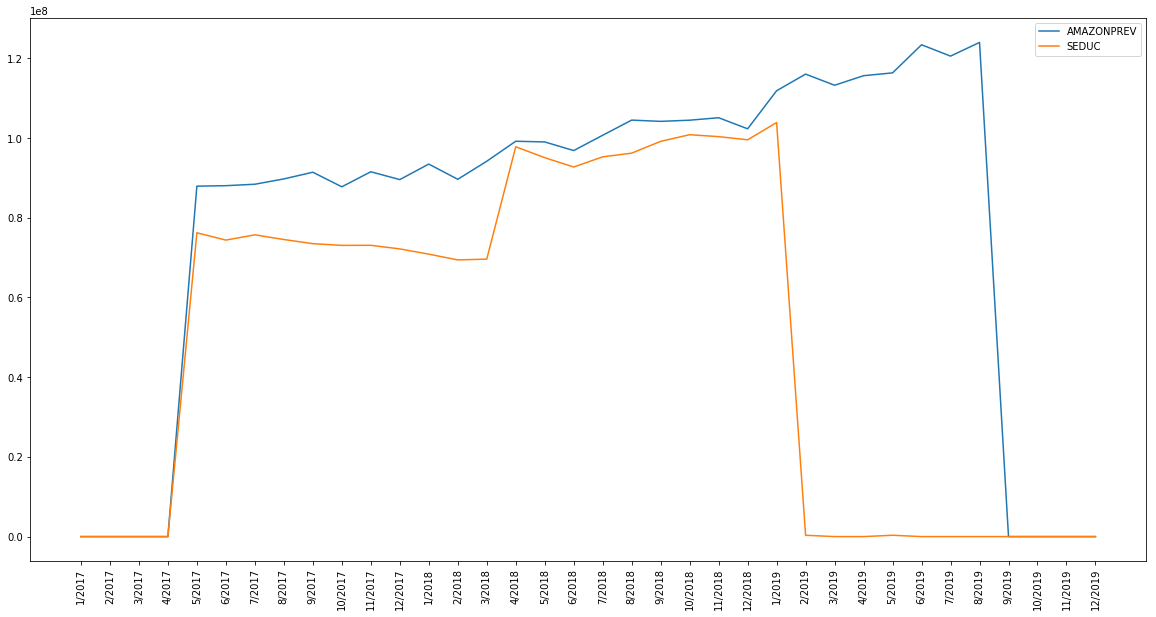

In [8]:
c_org = 0
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    
    maior = 0
    orgao_tots = []
    
#     if(orgao != 'AMAZONPREV' and orgao != 'SUSAM' and orgao != 'SEDUC'):
#         continue
    print(orgao)    
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
    if (maior >= 100000000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")
        
    c_org += 1

## Remuneração total por órgão em 2017

In [90]:
data = []
for orgao in orgaos:
    orgao_tots = []
    for ano in anos:
        if (ano != 2017):
            continue
#         print("###", ano)
        rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao)]
        rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
        rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
#             print(rem)
        data.append(rem)
        

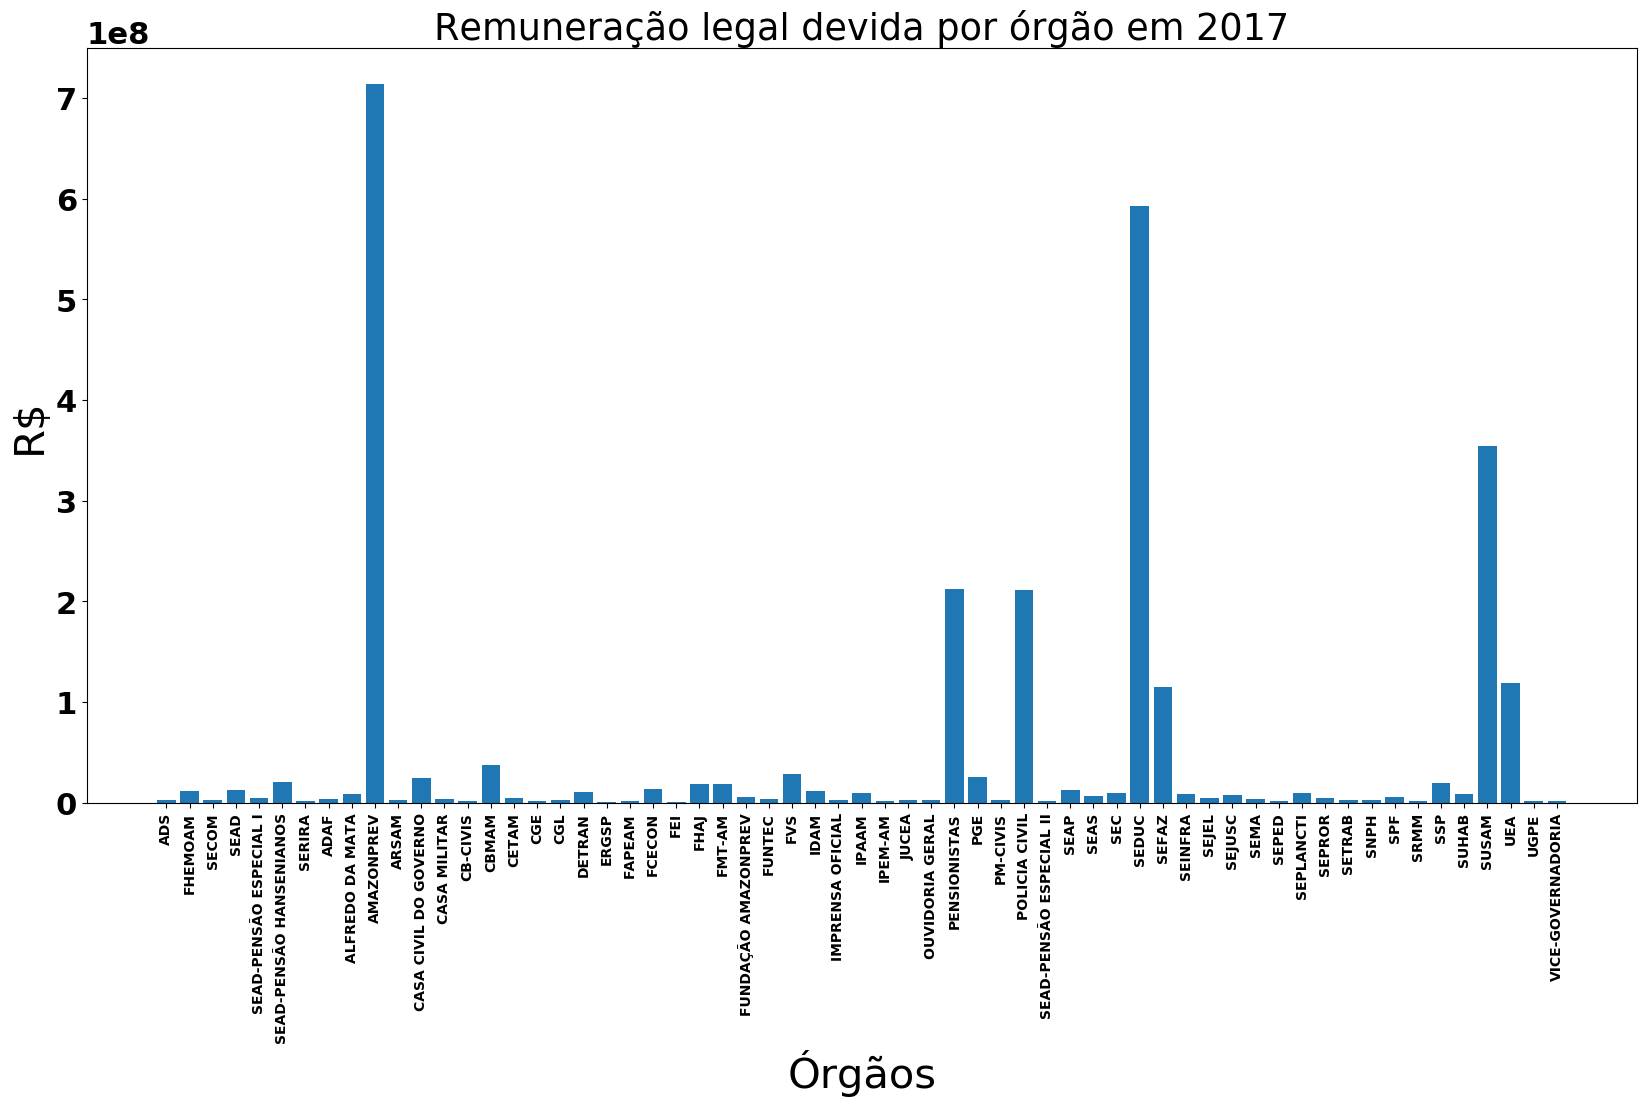

In [93]:
plot_bar('Remuneração legal devida por órgão em 2017',orgaos, data, 'Órgãos', 'R$')

## Numero de funcionarios por órgão em 2017

In [98]:
data = []
for orgao in orgaos:
    orgao_tots = []
    for ano in anos:
        if (ano != 2017):
            continue
#         print("###", ano)
        rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao)]
        rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
        rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].count()
#             print(rem)
        data.append(rem)
        

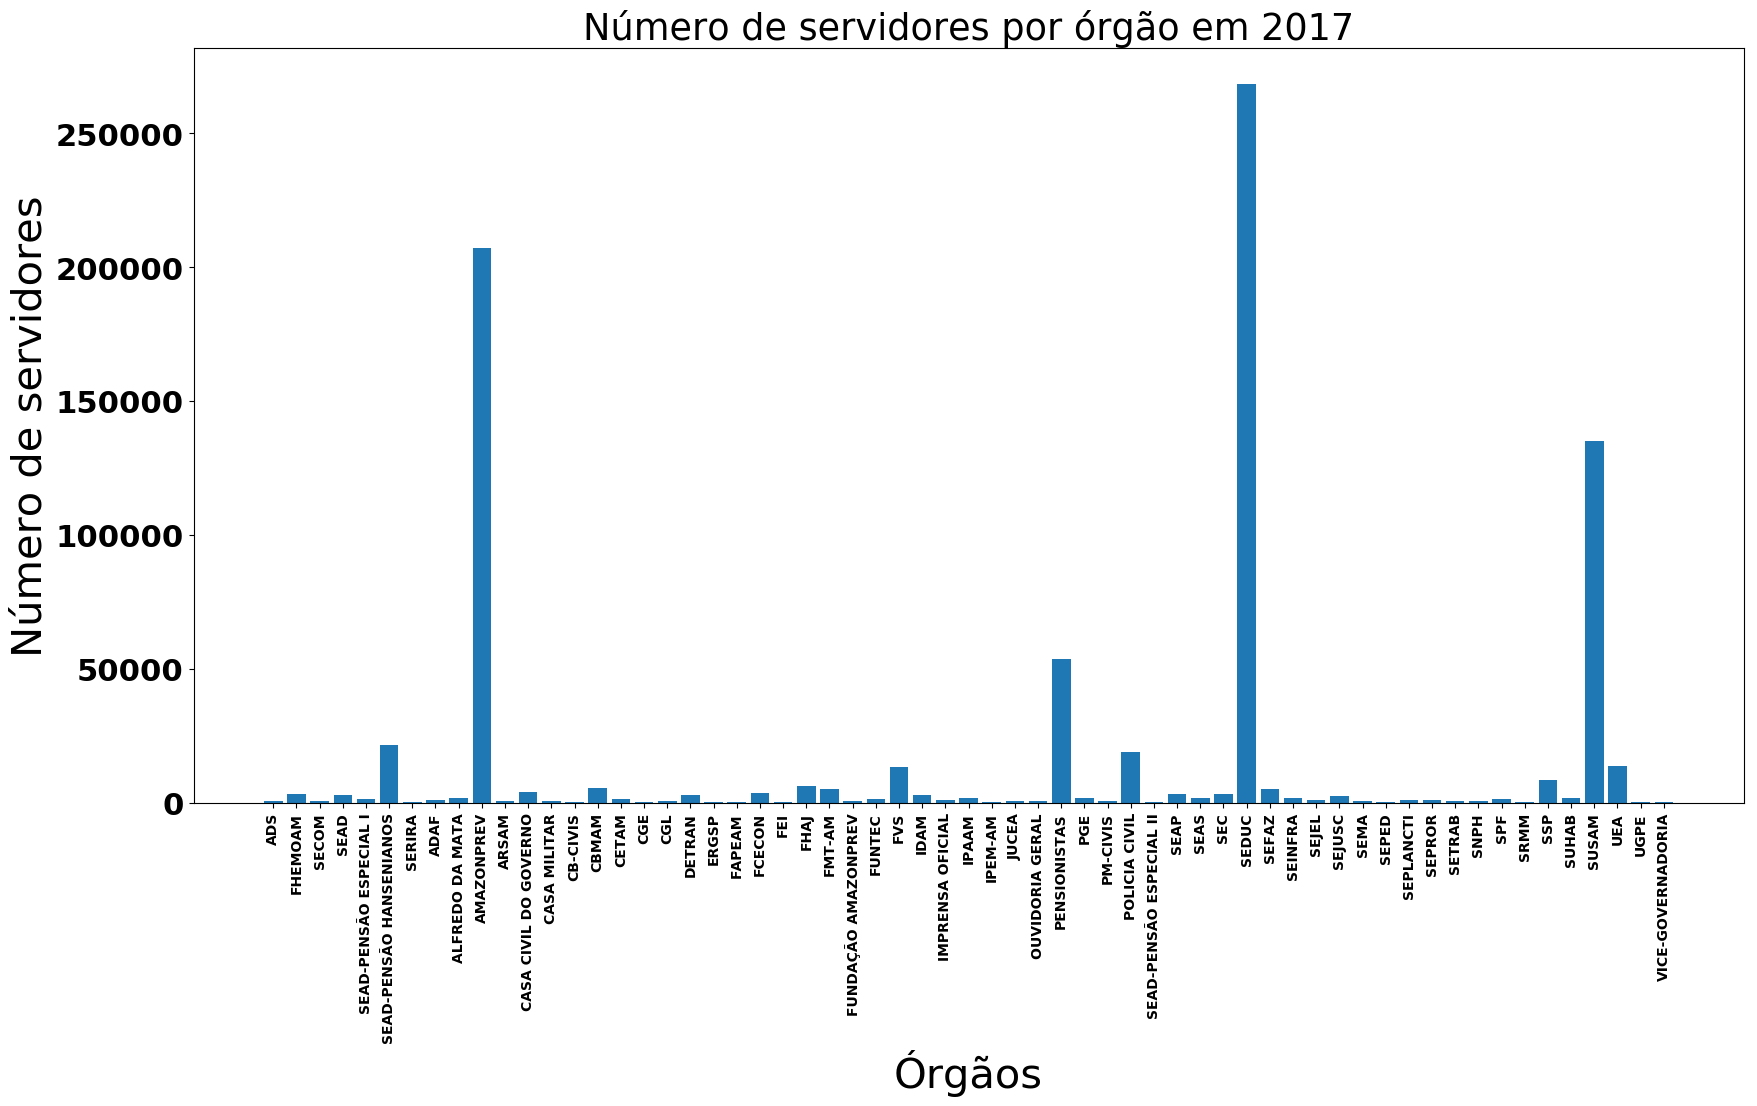

In [99]:
plot_bar('Número de servidores por órgão em 2017', orgaos, data, 'Órgãos', 'Número de servidores')

## Maior remuneração de cada órgão em 2017

In [96]:
data = []
for orgao in orgaos:
    orgao_tots = []
    for ano in anos:
        if (ano != 2017):
            continue
#         print("###", ano)
        rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao)]
        rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
        rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].max()
#             print(rem)
        data.append(rem)
        

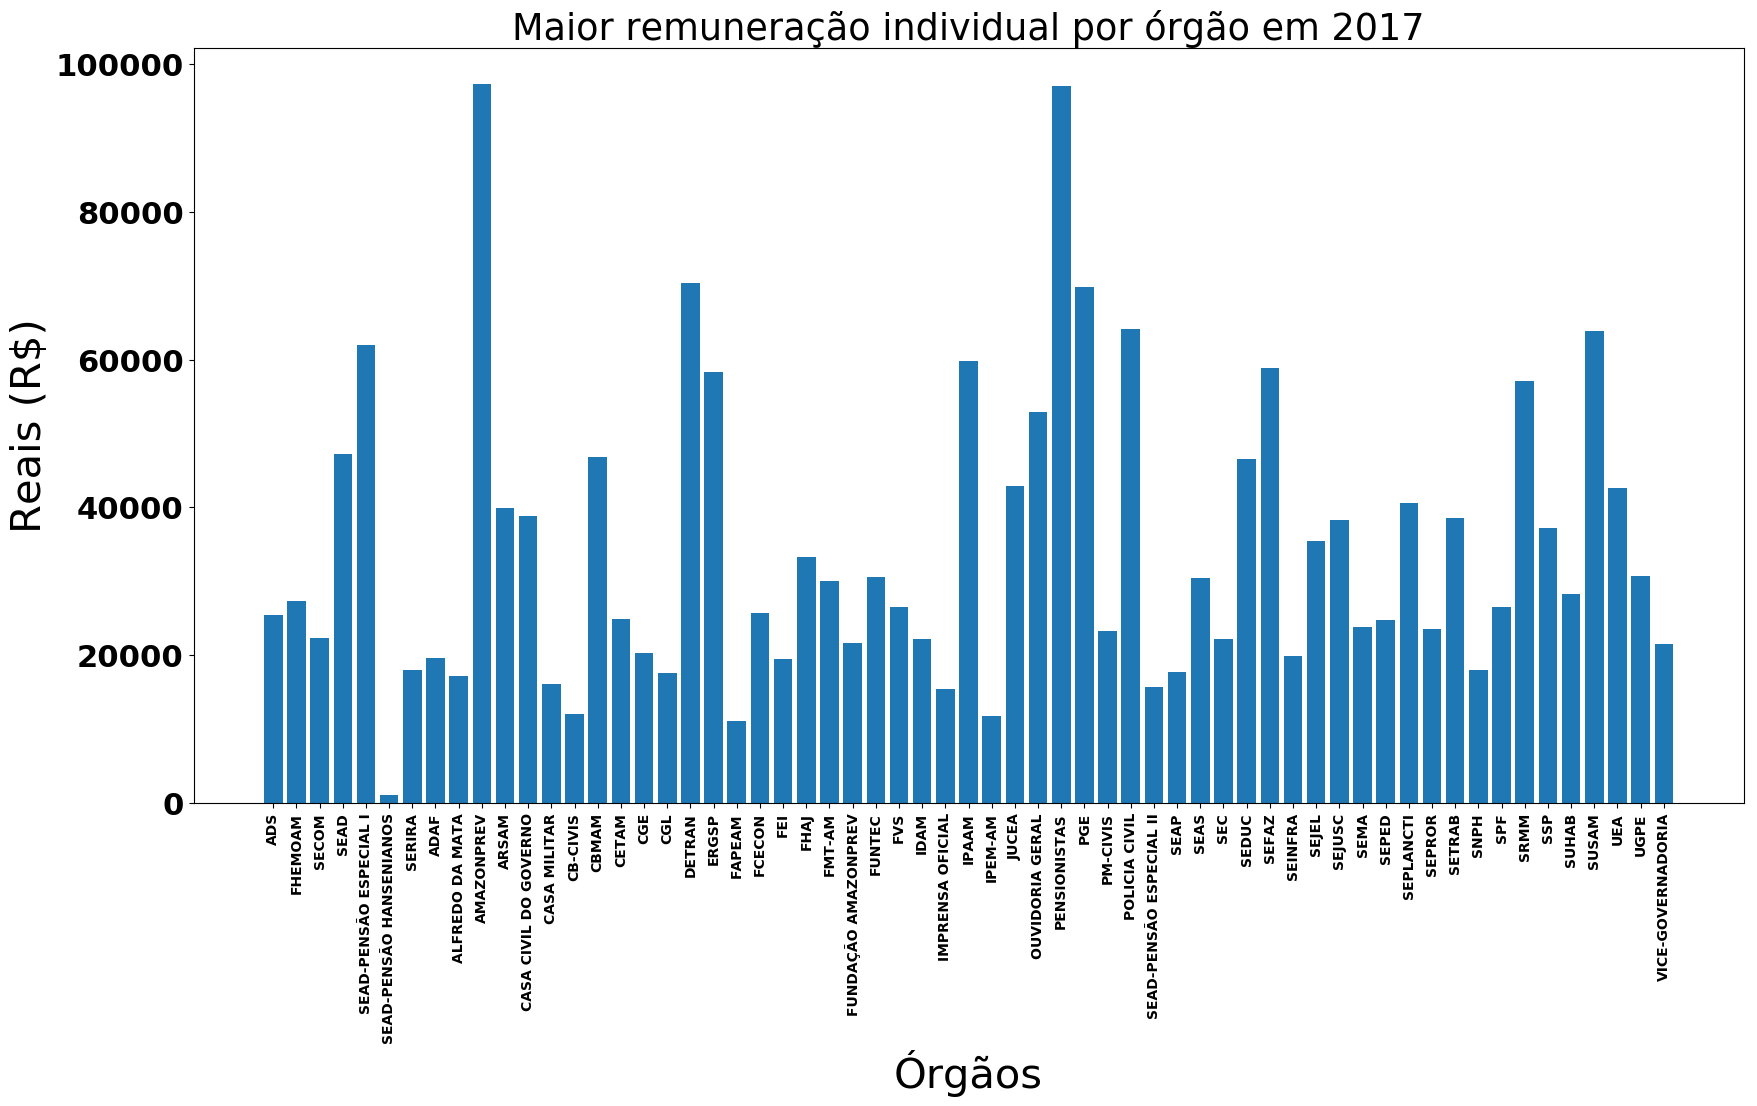

In [97]:
plot_bar('Maior remuneração individual por órgão em 2017', orgaos, data, 'Órgãos', 'Reais (R$)')